# Introduction to matplotlib

> “The simple graph has brought more information to the data analyst’s mind than any other device.” — John Tukey

Matplotlib is a defacto standard for scientific plotting in Python.

Other noteworthy plotting libraries:

* [plotly](https://plotly.com/) - nice defaults and easy for use, possible to create interactive online visualizations, commercial support available
* [bokeh]() - interactive plots made easy, it may be slightly more complicated to install and create hardcopy graphs
* [altair](https://altair-viz.github.io/index.html) - relatively new, in active development, implements declarative language inspired by "grammar of graphics" ideas 

In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
import pandas as pd
import matplotlib.pyplot as plt
set_matplotlib_formats("svg")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Let's calculate some basic descriptive statistics:

In [3]:
df.groupby("dataset")['y'].aggregate(['mean', 'std'])

,mean,std
dataset,,
I,7.500909,2.031568
II,7.500909,2.031657
III,7.500000,2.030424
IV,7.500909,2.030579


As you see all the datasets have the same mean and standard deviation.

In [4]:
dataset1 = df[df['dataset'] == "I"].drop('dataset', axis=1)

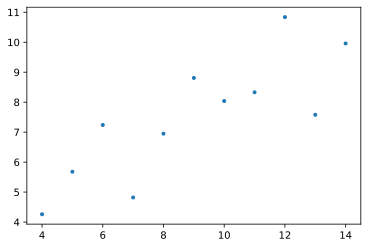

In [5]:
plt.plot(dataset1['x'], dataset1['y'], '.')

<BarContainer object of 11 artists>

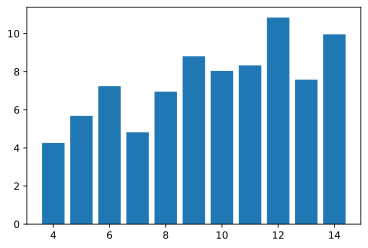

In [6]:
plt.bar(dataset1['x'], dataset1['y'])

### Mutliple datasets

In [7]:
datasets = [df for g,df in df.groupby("dataset")]

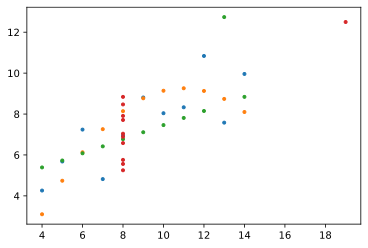

In [8]:
plt.plot(datasets[0]['x'], datasets[0]['y'], '.')
plt.plot(datasets[1]['x'], datasets[1]['y'], '.')
plt.plot(datasets[2]['x'], datasets[2]['y'], '.')
plt.plot(datasets[3]['x'], datasets[3]['y'], '.')

### Subplots

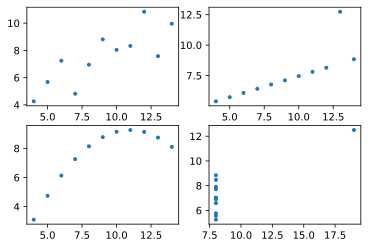

In [9]:
fig, axes = plt.subplots(2,2)
axes[0, 0].plot(datasets[0]['x'], datasets[0]['y'], '.')
axes[1, 0].plot(datasets[1]['x'], datasets[1]['y'], '.')
axes[0, 1].plot(datasets[2]['x'], datasets[2]['y'], '.')
axes[1, 1].plot(datasets[3]['x'], datasets[3]['y'], '.')

**Quiz** Which of the following commands will produce 5 subplots in the same row:

a) `fig, axes = plt.subplots(5, 1)`

b) `fig, axes = plt.subplots(1, 5)`

c) `fig, axes = plt.subplots(5)`

d) `fig, axes = plt.subplots((5, 1))`

## Annotating

### Labels

Using the `plt.xlabel` function

Text(0, 0.5, 'income')

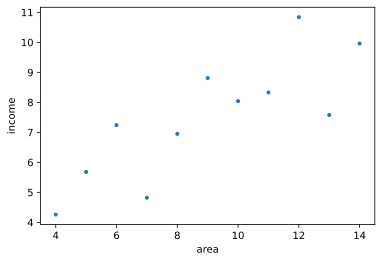

In [10]:
plt.plot(dataset1['x'], dataset1['y'], '.')
plt.xlabel('area')
plt.ylabel('income')

or `.set_xlabel` on the axes variable (use `plt.tight_layout` to make more space around the axes for the labels).

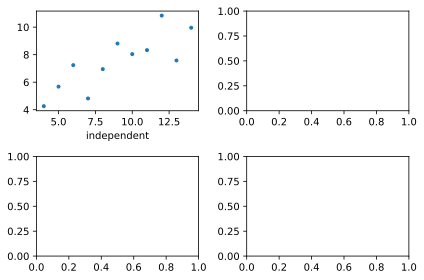

In [11]:
fig, axes = plt.subplots(2,2)
axes[0, 0].plot(dataset1['x'], dataset1['y'], '.')
axes[0, 0].set_xlabel("independent")
plt.tight_layout()

### Legend

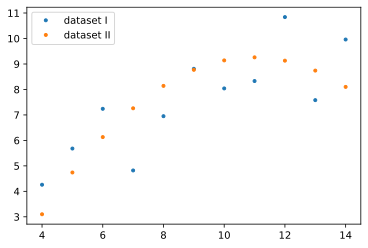

In [12]:
plt.plot(datasets[0]['x'], datasets[0]['y'], '.', label="dataset I")
plt.plot(datasets[1]['x'], datasets[1]['y'], '.', label="dataset II")
plt.legend()

### Arrows and Text

Text(0.6, 0.1, 'Anscombe dataset')

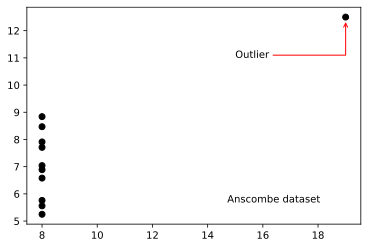

In [13]:
plt.plot(datasets[3]['x'], datasets[3]['y'], 'ko')

plt.annotate("Outlier",
                xy=(19, 12.5), xycoords='data',
                xytext=(15, 11), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                color='r',
                                shrinkA=2, shrinkB=5,
                                connectionstyle='angle,angleA=180,angleB=90,rad=0'
                                )
            )
plt.annotate("Anscombe dataset", xy=(0.6, 0.1), xycoords='axes fraction')

**Exercise** Given the following table of student notes, show the tests results as a bar plot. Annotate the axes, add a legend.

Note | No students (test 1) | No students (test 2)
--- | --- | --- 
A | 3 | 4
B | 1 | 2
C | 8 | 1
D | 2 | 5
E | 0 | 1

**Hint** You can either use the pandas plot(kind='bar') command or use plt.bar directly. In the latter case, you will have to fabricate x coordinates, such as the bars for test 2 are shifted. See example, below:

![](student_notes.svg)

## Creating visual style

Points of view, Nature, 2011--16, http://blogs.nature.com/methagora/2013/07/data-visualization-points-of-view.html


Telenczuk, [Visualisation checklist](checklist.svg)

### Main principles

1. Keep only the necessary markings (no decorations etc.)
2. Represent data faithfully (no 3d graphs, etc.)
3. Use whitespace wisely.
4. Use colour sparingly, mind colorblind people.
5. Strive for consistent style (font types, sizes, etc.)


### Removing spines

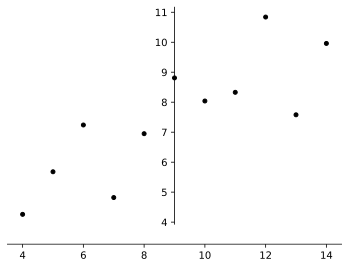

In [14]:
fig, ax = plt.subplots()
ax.plot(datasets[0]['x'], datasets[0]['y'], 'ko', ms=4, clip_on=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 20))
ax.spines['left'].set_position('center')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

### Modify default style

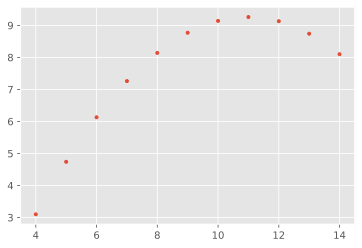

In [15]:
plt.style.use("ggplot")
plt.plot(datasets[0]['x'], datasets[1]['y'], '.')

In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Change style dynamically using rcParams

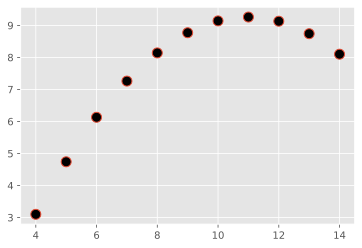

In [17]:
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 20
mpl.rcParams['lines.markerfacecolor'] = 'k'
plt.plot(datasets[0]['x'], datasets[1]['y'], '.')

In [18]:
# to see all configurable parameters uncomment the following line
# mpl.rcParams

**Exercise** Try different styles for the student note graph. Try following the visualisation principles listed at the beginning of this section.

## Exporting 

Key points:
    
* `plt.savefig`
* vector (SVG, PDF) vs raster (PNG) graphics

![](Bitmap_VS_SVG.svg)
Downloaded from: https://commons.wikimedia.org/wiki/File:Bitmap_VS_SVG.svg, licensed with CC-BY-2.5, copyright Wikipedia contributors

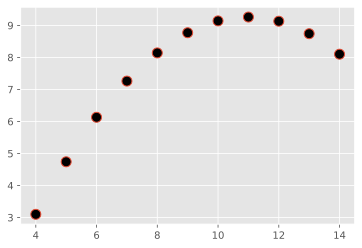

In [19]:
plt.plot(datasets[0]['x'], datasets[1]['y'], '.')
plt.savefig("anscombe.svg")
plt.savefig("anscombe.png")

**Quiz** Which of the following image formats: SVG, JPEG, PDF, PNG 

would you use for :

a) graphs in print (poster, paper)

b) graph in PowerPoint presentation

c) editing with inkscape

e) opening in photoshop/gimp

f) storing photo from microscope

**Quiz** Fill in the gaps

```python
import matplotlib.pyplot as ____

fig, ___ = plt.subplots(2, 1)

ax[0].plot(datasets[1]['x'], datasets[1]['y'])
ax[0].____("x coordinate")
ax[0].____("y coordinate")
ax[___].plot(datasets[2]['x'], datasets[2]['y'])
ax[___].____["bottom"].set_position(("outward", 5))
plt.____("anscombe.svg")

```

## Complete example

Text(0, 0.9, 'frequency')

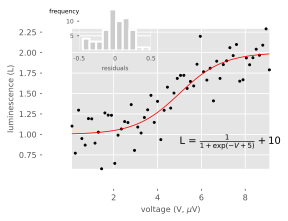

In [20]:
from matplotlib import rcParams

# set plot attributes
fig_width = 5  # width in inches
fig_height = 3  # height in inches
fig_size = [fig_width, fig_height]
params = {
    "axes.labelsize": 8,
    "axes.titlesize": 8,
    "font.size": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": fig_size,
    "savefig.dpi": 600,
    "font.family": "sans-serif",
    "axes.linewidth": 0.5,
    "xtick.major.size": 2,
    "ytick.major.size": 2,
    "font.size": 8,
}
rcParams.update(params)


import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1.0 / (1 + np.exp(-(x - 5))) + 1


np.random.seed(1234)
t = np.arange(0.1, 9.2, 0.15)
y = sigmoid(t) + 0.2 * np.random.randn(len(t))
residuals = y - sigmoid(t)

t_fitted = np.linspace(0, 10, 100)

# adjust subplots position
fig = plt.figure()

ax1 = plt.axes((0.18, 0.20, 0.55, 0.65))
plt.plot(t, y, "k.", ms=4.0, clip_on=False)
plt.plot(t_fitted, sigmoid(t_fitted), "r-", lw=0.8)

plt.text(
    5,
    1.0,
    r"L = $\frac{1}{1+\exp(-V+5)}+10$",
    fontsize=10,
    transform=ax1.transData,
    clip_on=False,
    va="top",
    ha="left",
)

# set axis limits
ax1.set_xlim((t.min(), t.max()))
ax1.set_ylim((y.min(), y.max()))

# hide right and top axes
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_position(("outward", 20))
ax1.spines["left"].set_position(("outward", 30))
ax1.yaxis.set_ticks_position("left")
ax1.xaxis.set_ticks_position("bottom")

# set labels
plt.xlabel(r"voltage (V, $\mu$V)")
plt.ylabel("luminescence (L)")

# make inset
ax_inset = plt.axes((0.2, 0.75, 0.2, 0.2), frameon=False)
plt.hist(residuals, fc="0.8", ec="w", lw=2)
plt.xticks([-0.5, 0, 0.5], [-0.5, 0, 0.5], size=6)
plt.xlim((-0.5, 0.5))
plt.yticks([5, 10], size=6)
plt.xlabel("residuals", size=6)
ax_inset.xaxis.set_ticks_position("none")
ax_inset.yaxis.set_ticks_position("left")
# plt.hlines([0, 5, 10],-0.6,0.6, lw=1, color='w')
ax_inset.yaxis.grid(lw=1, color="w", ls="-")
plt.text(
    0, 0.9, "frequency", transform=ax_inset.transAxes, va="center", ha="right", size=6
)
